In [1]:
#importing libraries
import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from collections import Counter

In [2]:
#read excel file
data=pd.read_excel("Student Applications & Performance.xlsx")

In [3]:
#data preview
data.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [4]:
#shape of data read
data.shape

(3400, 56)

In [5]:
#check for null in data
data.isnull().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURS

In [6]:
#removing column 'STDNT_TEST_ENTRANCE1' and 'STDNT_TEST_ENTRANCE2' as we have combined score of 
#'STDNT_TEST_ENTRANCE_COMB'
data=data.drop(['STDNT_TEST_ENTRANCE1' , 'STDNT_TEST_ENTRANCE2'],axis=1)

In [7]:
#filling missing values with median
data['STDNT_TEST_ENTRANCE_COMB'].fillna(data['STDNT_TEST_ENTRANCE_COMB'].median(), inplace=True)
data['HIGH_SCHL_GPA'].fillna(data['HIGH_SCHL_GPA'].median(), inplace=True)
data['DISTANCE_FROM_HOME'].fillna(data['DISTANCE_FROM_HOME'].median(), inplace=True)
data['FATHER_HI_EDU_CD'].fillna(data['FATHER_HI_EDU_CD'].median(), inplace=True)
data['MOTHER_HI_EDU_CD'].fillna(data['MOTHER_HI_EDU_CD'].median(), inplace=True)
data['SECOND_TERM_ATTEMPT_HRS'].fillna(data['SECOND_TERM_ATTEMPT_HRS'].median(), inplace=True)
data['SECOND_TERM_EARNED_HRS'].fillna(data['SECOND_TERM_EARNED_HRS'].median(), inplace=True)

In [8]:
#some course name columns have missing values because students did not picked them so filling those features and their 
#corresponding grades with NA
course_names=['CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_3_F','CORE_COURSE_NAME_4_F',
     'CORE_COURSE_NAME_5_F','CORE_COURSE_NAME_6_F','CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S',
     'CORE_COURSE_NAME_3_S','CORE_COURSE_NAME_4_S','CORE_COURSE_NAME_5_S','CORE_COURSE_NAME_6_S']
course_grades=['CORE_COURSE_GRADE_2_F','CORE_COURSE_GRADE_3_F','CORE_COURSE_GRADE_4_F','CORE_COURSE_GRADE_5_F','CORE_COURSE_GRADE_6_F', 
       'CORE_COURSE_GRADE_1_S','CORE_COURSE_GRADE_2_S','CORE_COURSE_GRADE_3_S','CORE_COURSE_GRADE_4_S', 'CORE_COURSE_GRADE_5_S', 
       'CORE_COURSE_GRADE_6_S']
data[course_names]=data[course_names].fillna('NA')
data[course_grades]=data[course_grades].fillna('NA')

In [9]:
data=data.drop([data.index[245]],axis=0)
data.isnull().sum()

STUDENT IDENTIFIER          0
STDNT_AGE                   0
STDNT_GENDER                0
STDNT_BACKGROUND            0
IN_STATE_FLAG               0
INTERNATIONAL_STS           0
STDNT_MAJOR                 0
STDNT_MINOR                 0
STDNT_TEST_ENTRANCE_COMB    0
FIRST_TERM                  0
CORE_COURSE_NAME_1_F        0
CORE_COURSE_GRADE_1_F       0
CORE_COURSE_NAME_2_F        0
CORE_COURSE_GRADE_2_F       0
CORE_COURSE_NAME_3_F        0
CORE_COURSE_GRADE_3_F       0
CORE_COURSE_NAME_4_F        0
CORE_COURSE_GRADE_4_F       0
CORE_COURSE_NAME_5_F        0
CORE_COURSE_GRADE_5_F       0
CORE_COURSE_NAME_6_F        0
CORE_COURSE_GRADE_6_F       0
SECOND_TERM                 0
CORE_COURSE_NAME_1_S        0
CORE_COURSE_GRADE_1_S       0
CORE_COURSE_NAME_2_S        0
CORE_COURSE_GRADE_2_S       0
CORE_COURSE_NAME_3_S        0
CORE_COURSE_GRADE_3_S       0
CORE_COURSE_NAME_4_S        0
CORE_COURSE_GRADE_4_S       0
CORE_COURSE_NAME_5_S        0
CORE_COURSE_GRADE_5_S       0
CORE_COURS

In [10]:
#switching 0 and 1 so that 1 denotes students dropped and 0 otherwise
data['RETURNED_2ND_YR']=data['RETURNED_2ND_YR'].replace({0:1,1:0})

In [11]:
grade_names=data[['CORE_COURSE_GRADE_1_F','CORE_COURSE_GRADE_2_F','CORE_COURSE_GRADE_3_F',
             'CORE_COURSE_GRADE_4_F','CORE_COURSE_GRADE_5_F','CORE_COURSE_GRADE_6_F']].mode(axis=1)

In [12]:
grade_names.isnull().sum()

0       0
1    2391
2    3198
3    3395
4    3395
5    3395
dtype: int64

In [13]:
grade_names=grade_names.drop([1,2,3,4,5],axis=1)

In [14]:
#crerating a variable with mode values of grades in first term
data['Average_grade_F']=grade_names

In [15]:
grade_names=data[['CORE_COURSE_GRADE_1_S','CORE_COURSE_GRADE_2_S','CORE_COURSE_GRADE_3_S','CORE_COURSE_GRADE_4_S',
       'CORE_COURSE_GRADE_5_S','CORE_COURSE_GRADE_6_S']].mode(axis=1)

In [16]:
grade_names=grade_names.drop([1,2,3,4,5],axis=1)

In [17]:
#crerating a variable with mode values of grades in second term
data['Average_grade_S']=grade_names

In [18]:
#droping features which do not have mode column, this will reduce dimensionality
data=data.drop(['CORE_COURSE_NAME_1_F','CORE_COURSE_GRADE_1_F', 'CORE_COURSE_NAME_2_F',
       'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_NAME_3_F',
       'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_NAME_4_F',
       'CORE_COURSE_GRADE_4_F', 'CORE_COURSE_NAME_5_F',
       'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_NAME_6_F','CORE_COURSE_GRADE_6_F'],axis=1)

In [19]:
data=data.drop(['CORE_COURSE_NAME_1_S',
       'CORE_COURSE_GRADE_1_S', 'CORE_COURSE_NAME_2_S',
       'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_NAME_3_S',
       'CORE_COURSE_GRADE_3_S', 'CORE_COURSE_NAME_4_S',
       'CORE_COURSE_GRADE_4_S', 'CORE_COURSE_NAME_5_S',
       'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_NAME_6_S',
       'CORE_COURSE_GRADE_6_S'],axis=1)

In [20]:
data.shape

(3399, 32)

In [21]:
#converting high school GPA in category of High, Med and Low on the basis of percentile
data['HIGH_SCHL_GPA'].describe()

count    3399.000000
mean        3.202696
std         0.451840
min         0.000000
25%         2.870000
50%         3.200000
75%         3.550000
max         4.000000
Name: HIGH_SCHL_GPA, dtype: float64

In [22]:
def map_high_school_gpa(x):
    if x<=2.87:
        return 'Low'
    elif x<=3.2:
        return 'Med'
    else:
        return 'High'

In [23]:
data['HIGH_SCHL_GPA']=data['HIGH_SCHL_GPA'].map(map_high_school_gpa)

In [24]:
#converting enterance test comb marks in category of High, Med and Low on the basis of percentile
data['STDNT_TEST_ENTRANCE_COMB'].describe()

count    3399.000000
mean      996.498970
std       143.846038
min       530.000000
25%       910.000000
50%       990.000000
75%      1070.000000
max      1510.000000
Name: STDNT_TEST_ENTRANCE_COMB, dtype: float64

In [25]:
def map_comb_test(x):
    if x<=910:
        return 'Low'
    elif x<=990:
        return 'Med'
    else:
        return 'High'

In [26]:
data['STDNT_TEST_ENTRANCE_COMB']=data['STDNT_TEST_ENTRANCE_COMB'].map(map_comb_test)

In [27]:
#list of categorical features
categories=[feature for feature in data.columns if data[feature].dtypes=='O']
categories

['STDNT_GENDER',
 'STDNT_BACKGROUND',
 'IN_STATE_FLAG',
 'INTERNATIONAL_STS',
 'STDNT_MAJOR',
 'STDNT_MINOR',
 'STDNT_TEST_ENTRANCE_COMB',
 'HOUSING_STS',
 'HIGH_SCHL_GPA',
 'HIGH_SCHL_NAME',
 'FATHER_HI_EDU_DESC',
 'MOTHER_HI_EDU_DESC',
 'DEGREE_GROUP_CD',
 'DEGREE_GROUP_DESC',
 'Average_grade_F',
 'Average_grade_S']

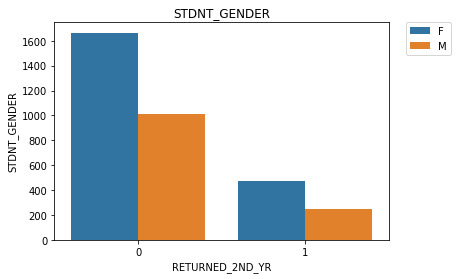

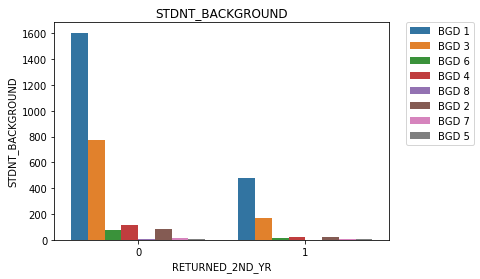

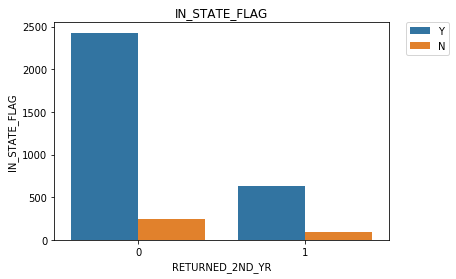

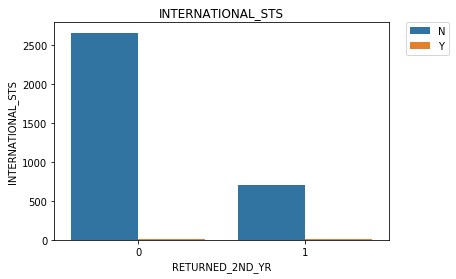

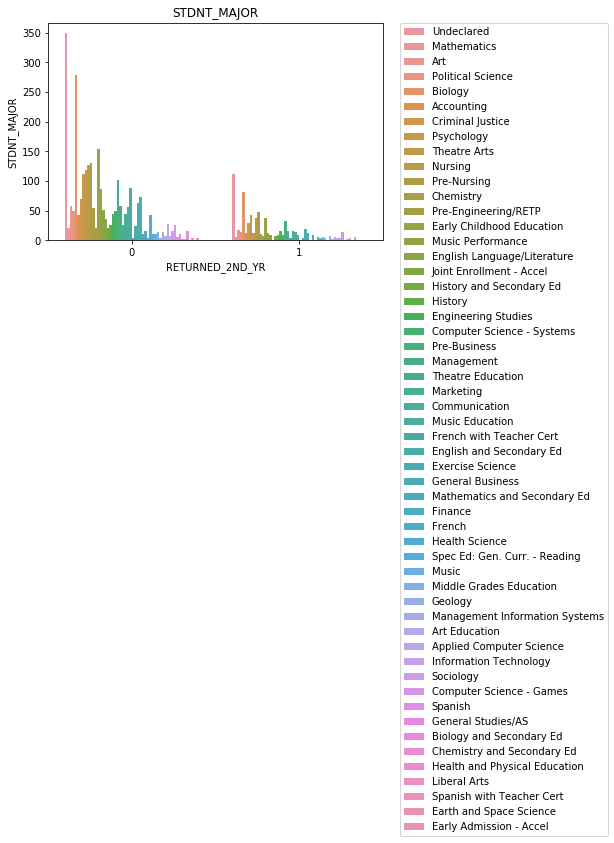

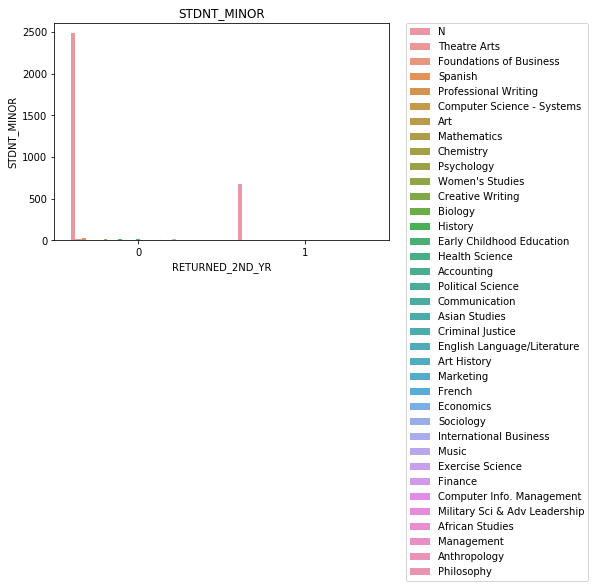

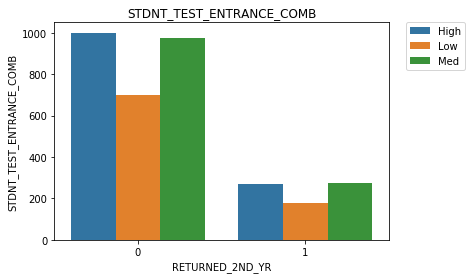

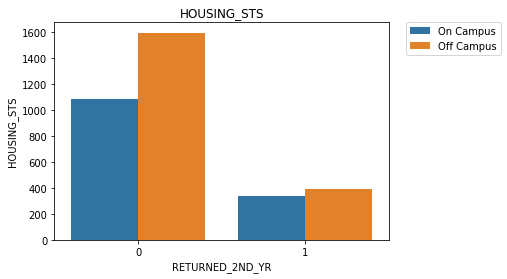

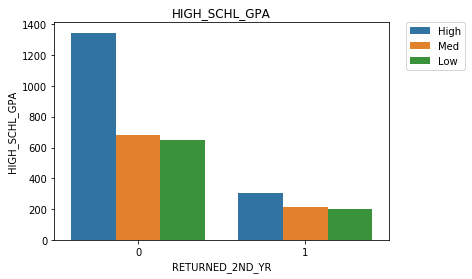

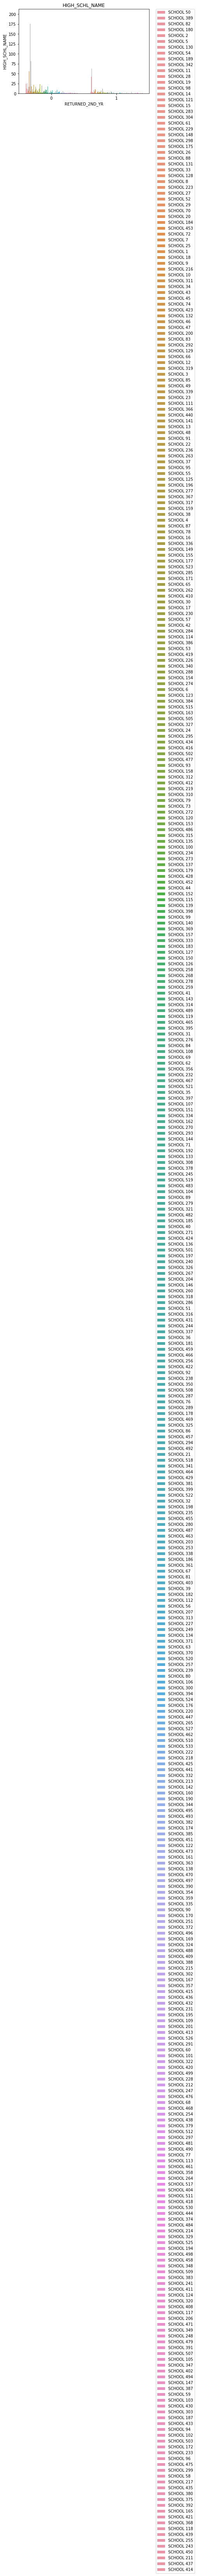

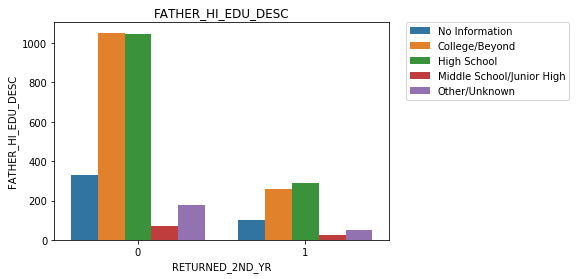

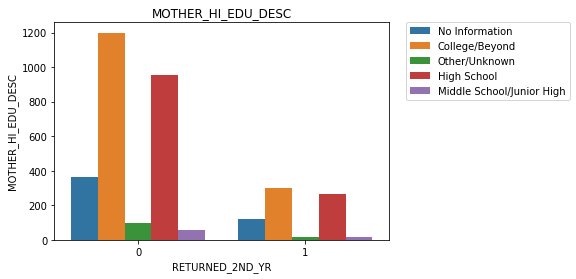

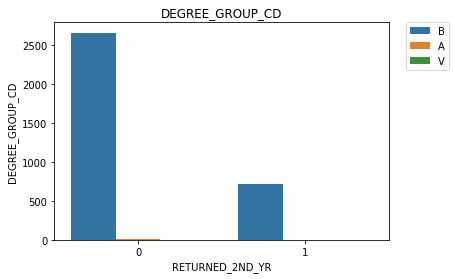

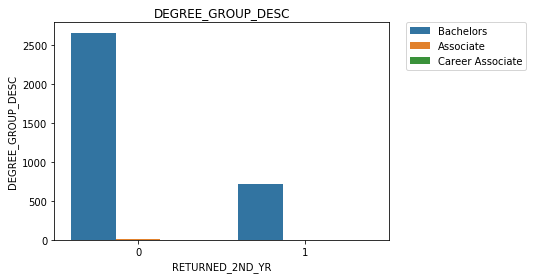

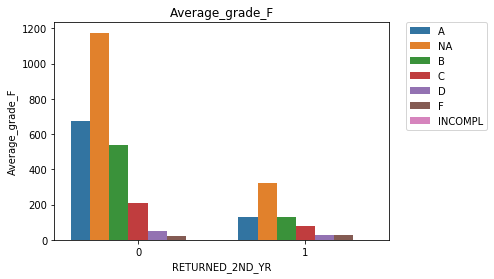

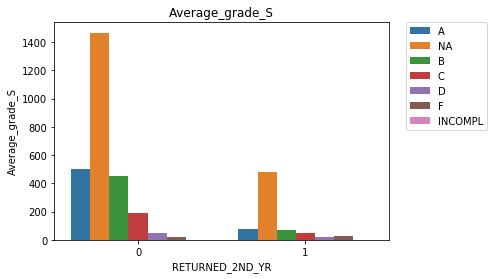

In [28]:
#impact of categorical features in students who returned in 2nd year
for feature in categories:
    plt.figure()
    #sns.set_style('whitegrid')
    sns.countplot(x='RETURNED_2ND_YR',hue=feature,data=data)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('RETURNED_2ND_YR')
    plt.ylabel(feature)
    plt.title(feature)
    #plt.savefig("C:\\Users\\Lenovo\\Desktop\\Capstone project\\"+feature+".jpeg")

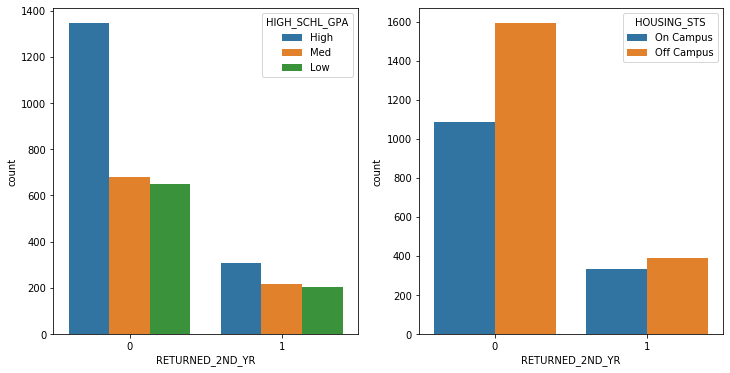

In [29]:
#from the above plotting it is very evident that GPA and housing status has a role to play in attrition
#1. Students with less GPA are less likely to drop
fig, axs = plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='RETURNED_2ND_YR',hue='HIGH_SCHL_GPA',data=data, ax=axs[0])

#2. Studunts with campus stay are less likely to drop
sns.countplot(x='RETURNED_2ND_YR',hue='HOUSING_STS',data=data, ax=axs[1])

In [30]:
# list of Discrete variables
discrete_feature=[feature for feature in data.columns if data[feature].dtypes!='O' and len(data[feature].unique())<25]
discrete_feature

['STDNT_AGE',
 'FIRST_TERM',
 'SECOND_TERM',
 'RETURNED_2ND_YR',
 'FATHER_HI_EDU_CD',
 'MOTHER_HI_EDU_CD',
 'FIRST_TERM_ATTEMPT_HRS',
 'FIRST_TERM_EARNED_HRS',
 'SECOND_TERM_ATTEMPT_HRS',
 'SECOND_TERM_EARNED_HRS']

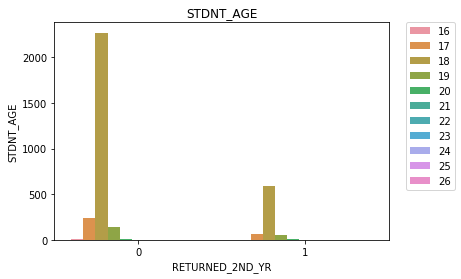

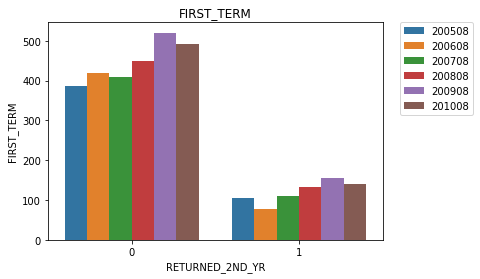

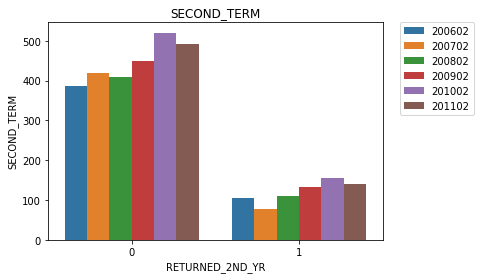

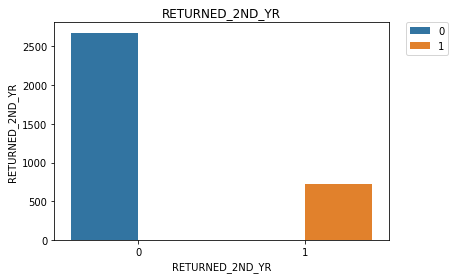

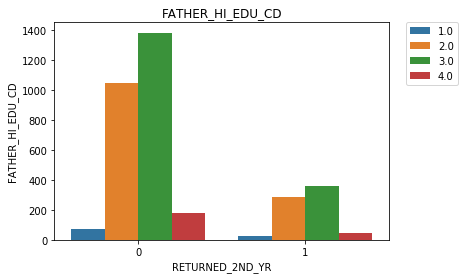

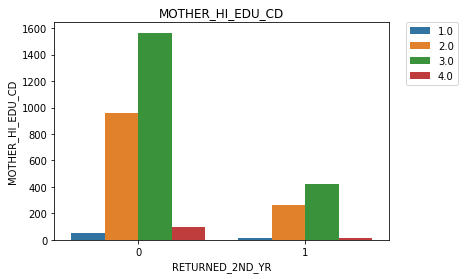

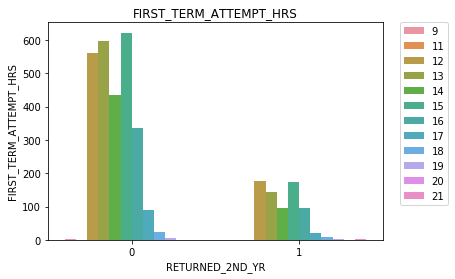

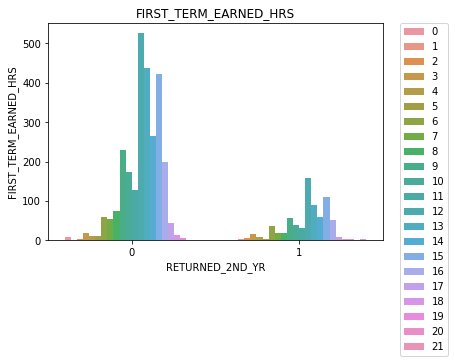

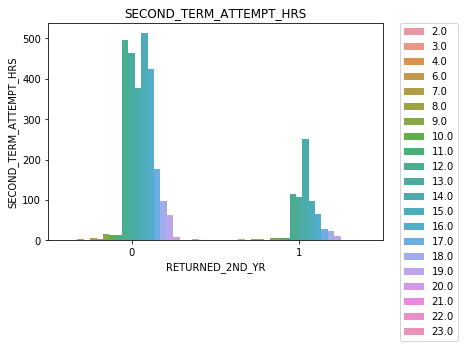

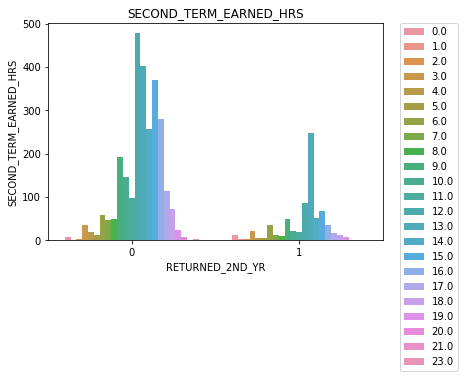

In [31]:
#impact of discrete features in students who returned in 2nd year
for feature in discrete_feature:
    plt.figure()
    sns.countplot(x='RETURNED_2ND_YR',hue=feature,data=data)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('RETURNED_2ND_YR')
    plt.ylabel(feature)
    plt.title(feature)
    #plt.savefig("C:\\Users\\Lenovo\\Desktop\\Capstone project\\"+feature+".jpeg")

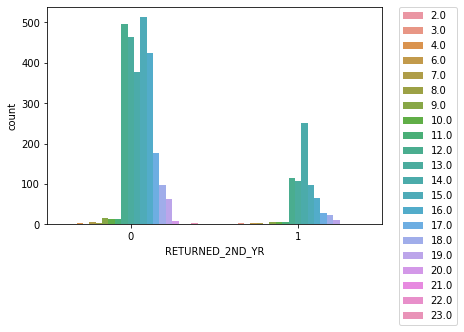

In [32]:
#from the above plotting it is very evident that behaviour of both kind of student is same but slightly differ in case of 
#second term attempt and earned hours

sns.countplot(x='RETURNED_2ND_YR',hue='SECOND_TERM_ATTEMPT_HRS',data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.figure()

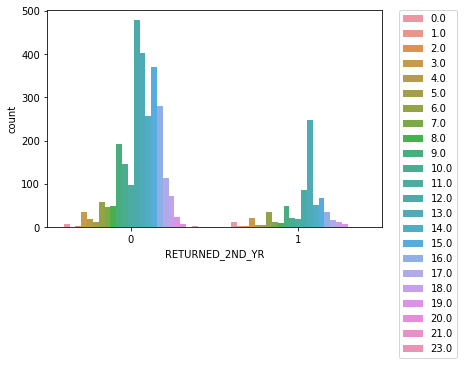

In [33]:
sns.countplot(x='RETURNED_2ND_YR',hue='SECOND_TERM_EARNED_HRS',data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [34]:
#list of continous variable
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['STUDENT IDENTIFIER']]
continuous_feature

['DISTANCE_FROM_HOME',
 'GROSS_FIN_NEED',
 'COST_OF_ATTEND',
 'EST_FAM_CONTRIBUTION',
 'UNMET_NEED']

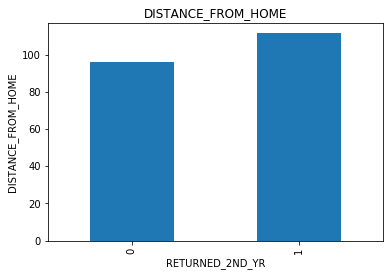

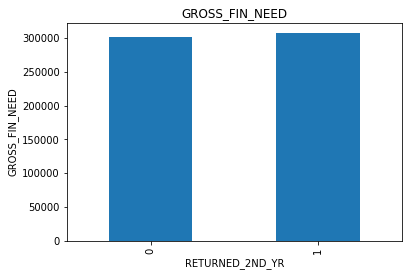

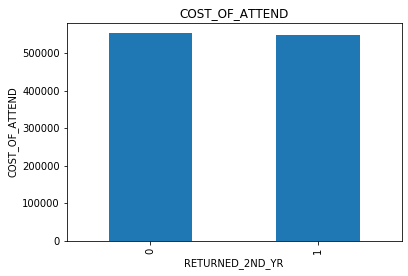

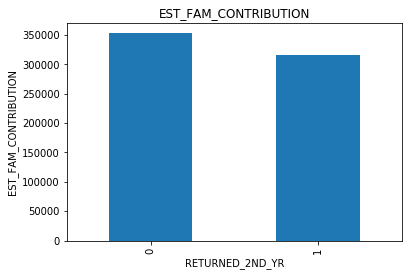

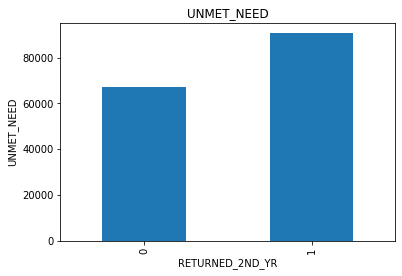

In [35]:
#impact of continous variable in students who returned in 2nd year
for feature in continuous_feature:
    plt.figure()
    data.groupby('RETURNED_2ND_YR')[feature].mean().plot.bar()
    plt.xlabel('RETURNED_2ND_YR')
    plt.ylabel(feature)
    plt.title(feature)

In [36]:
#list of top 5 majors selected by students who attire early
data[data["RETURNED_2ND_YR"]==1].groupby("STDNT_MAJOR").agg("size").sort_values(ascending=False).head(5)

STDNT_MAJOR
Undeclared                   111
Biology                       82
Pre-Nursing                   47
Psychology                    43
Early Childhood Education     37
dtype: int64

In [37]:
#list of top 5 majors selected by students who didn't attire early
data[data["RETURNED_2ND_YR"]==0].groupby("STDNT_MAJOR").agg("size").sort_values(ascending=False).head(5)

STDNT_MAJOR
Undeclared                   349
Biology                      279
Early Childhood Education    153
Pre-Nursing                  130
Nursing                      127
dtype: int64

In [38]:
#model creation

In [39]:
X=data.drop(['RETURNED_2ND_YR','STUDENT IDENTIFIER'],axis=1)
y=data['RETURNED_2ND_YR']

In [40]:
X=pd.get_dummies(X)

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=400)

In [42]:
#define models to test
base_models=[("DT_model", DecisionTreeClassifier(random_state=0)),
            ("RF_model", RandomForestClassifier(random_state=0, n_jobs=-1)),
            ("LR_model", LogisticRegression(random_state=0, n_jobs=-1)),
            ("XGB_model", xgboost.XGBClassifier(random_state=0, n_jobs=-1)),
            ("Naive_model" , GaussianNB()),
            ("Stochastic_model", SGDClassifier(loss="hinge", penalty="l2", max_iter=5)),
            ("svc_model", SVC(C=1.0, kernel='rbf')),
            ("Gradient_model", GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)),
            ("Neighbour_model", KNeighborsClassifier(n_neighbors=5, n_jobs=-1))]

In [43]:
kfold=5
splits=KFold(n_splits=kfold, shuffle=True, random_state=400)

In [44]:
for name, model in base_models:
    model_steps=Pipeline(steps=[('model', model)])
    
    cv_results=cross_val_score(model_steps, X, y, cv=splits, scoring='accuracy', n_jobs=-1)
    
    min_score=round(min(cv_results), 4)
    max_score=round(max(cv_results), 4)
    mean_score=round(np.mean(cv_results), 4)
    std_score=round(np.std(cv_results), 4)
    
    print(f"{name} cross validation accuracy score : {mean_score} +/- {std_score} min : {min_score} max : {max_score}")

DT_model cross validation accuracy score : 0.7364 +/- 0.0187 min : 0.7088 max : 0.7662
RF_model cross validation accuracy score : 0.7958 +/- 0.008 min : 0.7868 max : 0.81
LR_model cross validation accuracy score : 0.7873 +/- 0.0065 min : 0.7809 max : 0.7997
XGB_model cross validation accuracy score : 0.8235 +/- 0.0065 min : 0.8162 max : 0.8351
Naive_model cross validation accuracy score : 0.7841 +/- 0.0046 min : 0.7794 max : 0.7923
Stochastic_model cross validation accuracy score : 0.6973 +/- 0.1175 min : 0.5118 max : 0.7997
svc_model cross validation accuracy score : 0.7873 +/- 0.0065 min : 0.7809 max : 0.7997
Gradient_model cross validation accuracy score : 0.8176 +/- 0.0103 min : 0.8015 max : 0.8306
Neighbour_model cross validation accuracy score : 0.7523 +/- 0.008 min : 0.7412 max : 0.7618


In [45]:
#as we see in the output of the above cell that gradient boosting and XGBoost gave the best and almost same result
#so will proceed further with XGBoost and tune the parameters to get more better results

In [46]:
classifier=xgboost.XGBClassifier()

In [47]:
## Using Hyper Parameter Optimization to get the best parameters for the classifier

params={
 "learning_rate"     : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "colsample_bytree"  : [0.1, 0.5, 1, 1.5, 5, 10],
 "max_delta_step"    : [0, 0.1, 0.5, 1, 1.5, 5, 10],
 "max_depth"         : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight"  : [ 1, 3, 5, 7, 10 ],
 "n_estimators"      : [0.1, 1, 10, 100, 500],
 "scale_pos_weight"  : [0.1, 0.5, 1, 10, 100, 500],
 "n_jobs"            : [-1, 1, 10, 50, 100, 500],
 "reg_alpha"         : [0, 0.1 , 0.5, 1, 5, 50, 100],
 "reg_lambda"        : [0.1, 0.5, 1, 5, 10, 50, 100],
 "subsample"         : [0, 0.1 , 0.5, 1, 5, 50, 100],
 "gamma"             : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree"  : [ 0.3, 0.4, 0.5, 0.7 ]  
}

In [48]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,
                                 scoring='roc_auc',n_jobs=4,cv=5,verbose=3)

In [49]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    4.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'min_child_weight': [1, 3, 5, 7, 10],
                                        'n_estimators': [0.1, 1, 10, 100, 500],
                   

In [50]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0,
              learning_rate=0.15, max_delta_step=1, max_depth=3,
              min_child_weight=10, missing=None, n_estimators=100, n_jobs=50,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=0.5, scale_pos_weight=0.1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [51]:
random_search.best_params_

{'subsample': 0.5,
 'scale_pos_weight': 0.1,
 'reg_lambda': 0.5,
 'reg_alpha': 0,
 'n_jobs': 50,
 'n_estimators': 100,
 'min_child_weight': 10,
 'max_depth': 3,
 'max_delta_step': 1,
 'learning_rate': 0.15,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [52]:
#setting best parameters in classifier on the basis of output of hyper parameter optimization
clf=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1)

In [53]:
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [54]:
score=cross_val_score(clf,X_train,y_train,cv=10)

In [55]:
score

array([0.82773109, 0.82773109, 0.82773109, 0.81512605, 0.83193277,
       0.80252101, 0.81512605, 0.83613445, 0.8487395 , 0.80168776])

In [56]:
score.mean()

0.8234460872956777

In [57]:
pred=clf.predict(X_test)

In [58]:
results = confusion_matrix(y_test, pred)

In [59]:
print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[772  21]
 [160  67]]


In [60]:
print ('Accuracy Score :')
print(accuracy_score(y_test, pred))
print ('Report : ')
print (classification_report(y_test, pred))

Accuracy Score :
0.8225490196078431
Report : 
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       793
           1       0.76      0.30      0.43       227

    accuracy                           0.82      1020
   macro avg       0.79      0.63      0.66      1020
weighted avg       0.81      0.82      0.79      1020



In [61]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)

In [62]:
Counter(y_test)

Counter({0: 793, 1: 227})

In [63]:
metrics.roc_auc_score(y_test, y_pred_proba)

0.7333496286338057

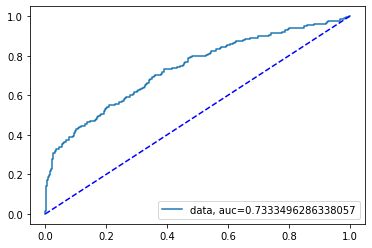

In [64]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.plot(x,y,'b--')
plt.legend(loc=4)
plt.show()

In [65]:
imp_features=pd.Series(clf.feature_importances_,index=X.columns.tolist())

In [66]:
#List of 10 important features
imp_features.sort_values(ascending=False).head(10)

SECOND_TERM_EARNED_HRS      0.047704
Average_grade_S_NA          0.039712
Average_grade_S_F           0.034396
SECOND_TERM_ATTEMPT_HRS     0.030057
IN_STATE_FLAG_Y             0.028645
Average_grade_S_A           0.025348
STDNT_MAJOR_Biology         0.021410
STDNT_MAJOR_Nursing         0.020508
Average_grade_S_B           0.020276
STDNT_MAJOR_Theatre Arts    0.018974
dtype: float32

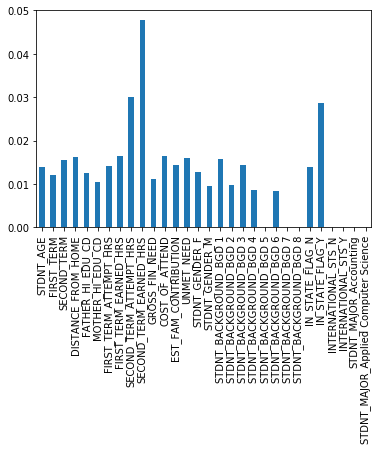

In [67]:
imp_features.head(30).plot(kind='bar')

In [68]:
#Extracting the TPR and FPR

df = pd.DataFrame()
df['False+ve_Rate']=pd.Series(fpr)
df['True+ve_Rate']=pd.Series(tpr)

df.head()
df.to_csv('tpr_fpr.csv')